## Завдання

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:



кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.



Рішення оформіть у вигляді окремого ноутбука.

## Імпорт необхідних бібліотек

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Nadam

from tensorflow.keras.layers import BatchNormalization

# tf.nn.max_pool2d

## Завантаження і підготовка даних

In [8]:
# Завантаження даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [9]:
# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


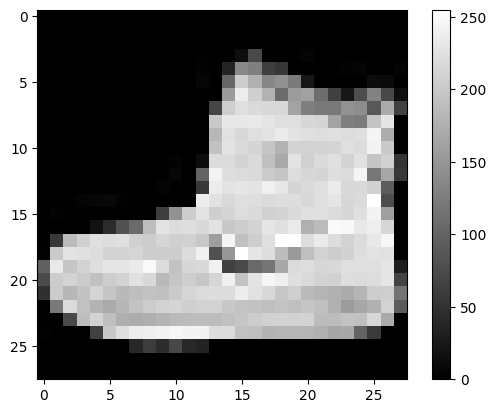

In [10]:
# Візуалізація першого зображення з тренувального датасету
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Нормалізація даних
train_images  = train_images  / 255.0
test_images  = test_images  / 255.0


In [12]:
# Зміна форми даних для відповідності вхідному формату Conv2D
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [13]:
# Розділення тренувального набору на тренувальний та валідаційний
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [14]:
# One-hot encoding міток
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
val_labels = to_categorical(val_labels, num_classes=10)

In [15]:
# Перевірка форм даних після перетворення
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


## Модель з Batch Normalization

In [21]:
# Створення моделі
model = Sequential()

# Перший згортковий шар
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# Другий згортковий шар
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# Третій згортковий шар
#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling2D()) #GlobalMaxPooling2D()
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# Повнозв'язний шар
# model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# # model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# Вихідний шар
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
#model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Nadam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Компіляція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_1 (Gl  (None, 64)               

Тренування моделі

In [24]:
# Навчання моделі з валідаційним набором
model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 64s 41ms/step - loss: 0.4654 - accuracy: 0.8320 - val_loss: 0.3458 - val_accuracy: 0.8725
Epoch 2/15
1500/1500 [==============================] - 72s 48ms/step - loss: 0.3182 - accuracy: 0.8824 - val_loss: 0.3055 - val_accuracy: 0.8885
Epoch 3/15
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2745 - accuracy: 0.8973 - val_loss: 0.2888 - val_accuracy: 0.8955
Epoch 4/15
1500/1500 [==============================] - 91s 61ms/step - loss: 0.2466 - accuracy: 0.9081 - val_loss: 0.3205 - val_accuracy: 0.8827
Epoch 5/15
1500/1500 [==============================] - 83s 56ms/step - loss: 0.2294 - accuracy: 0.9141 - val_loss: 0.3706 - val_accuracy: 0.8591
Epoch 6/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2079 - accuracy: 0.9230 - val_loss: 0.2591 - val_accuracy: 0.9066
Epoch 7/15
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1972 - accuracy: 0.9255 - val_loss: 0.3000 -

In [25]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.3770 - accuracy: 0.8937 - 3s/epoch - 9ms/step

Test accuracy: 0.8937000036239624


In [26]:
import numpy as np
from sklearn.metrics import classification_report

# Отримання передбачень для тестових даних
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.71      0.93      0.80      1000
           3       0.89      0.92      0.90      1000
           4       0.92      0.72      0.81      1000
           5       0.96      0.98      0.97      1000
           6       0.80      0.67      0.73      1000
           7       0.92      0.99      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.99      0.91      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [27]:
# Збереження моделі
model.save("fashion_mnist_model.keras")

## Модель з Dropout

In [28]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [29]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_2 (Gl  (None, 64)               

In [31]:
model_1.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))


Epoch 1/15
1500/1500 [==============================] - 56s 37ms/step - loss: 0.6893 - accuracy: 0.7539 - val_loss: 0.4662 - val_accuracy: 0.8292
Epoch 2/15
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4688 - accuracy: 0.8291 - val_loss: 0.3890 - val_accuracy: 0.8599
Epoch 3/15
1500/1500 [==============================] - 55s 37ms/step - loss: 0.4075 - accuracy: 0.8524 - val_loss: 0.3545 - val_accuracy: 0.8681
Epoch 4/15
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3735 - accuracy: 0.8653 - val_loss: 0.3213 - val_accuracy: 0.8824
Epoch 5/15
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3421 - accuracy: 0.8764 - val_loss: 0.3281 - val_accuracy: 0.8782
Epoch 6/15
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3209 - accuracy: 0.8822 - val_loss: 0.2961 - val_accuracy: 0.8903
Epoch 7/15
1500/1500 [==============================] - 77s 51ms/step - loss: 0.3046 - accuracy: 0.8893 - val_loss: 0.2884 -

In [32]:
# Отримання передбачень для навчальних та тестових даних
test_predictions = model_1.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.90      0.84      1000
           3       0.92      0.89      0.90      1000
           4       0.84      0.84      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.75      0.67      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [33]:
# Збереження моделі
model.save("fashion_mnist_model_1.keras")

## Модель тільки з використанням випрямного шару та внутрішніх шарів

In [34]:
# Побудова моделі нейронної мережі
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_2.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))


Epoch 1/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5180 - accuracy: 0.8160 - val_loss: 0.4174 - val_accuracy: 0.8493
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3889 - accuracy: 0.8604 - val_loss: 0.3724 - val_accuracy: 0.8663
Epoch 3/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3477 - accuracy: 0.8732 - val_loss: 0.3588 - val_accuracy: 0.8678
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3179 - accuracy: 0.8823 - val_loss: 0.3501 - val_accuracy: 0.8744
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3005 - accuracy: 0.8904 - val_loss: 0.3553 - val_accuracy: 0.8692
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2834 - accuracy: 0.8957 - val_loss: 0.3283 - val_accuracy: 0.8822
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2701 - accuracy: 0.8990 - val_loss: 0.3290 - val_accurac

In [38]:

test_predictions = model_2.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1000
           1       1.00      0.96      0.98      1000
           2       0.80      0.78      0.79      1000
           3       0.82      0.94      0.88      1000
           4       0.87      0.67      0.76      1000
           5       0.98      0.96      0.97      1000
           6       0.62      0.81      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [39]:

# Збереження моделі
model.save("fashion_mnist_model_2.keras")

## Модель з оптимізатором RMSprop

In [40]:

# Побудова моделі нейронної мережі
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [41]:
model_3.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model_3.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))


Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5246 - accuracy: 0.8132 - val_loss: 0.4402 - val_accuracy: 0.8441
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3891 - accuracy: 0.8581 - val_loss: 0.3702 - val_accuracy: 0.8687
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3522 - accuracy: 0.8730 - val_loss: 0.3715 - val_accuracy: 0.8677
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3321 - accuracy: 0.8820 - val_loss: 0.3399 - val_accuracy: 0.8791
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3152 - accuracy: 0.8866 - val_loss: 0.3498 - val_accuracy: 0.8774
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3038 - accuracy: 0.8923 - val_loss: 0.3674 - val_accuracy: 0.8744
Epoch 7/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2943 - accuracy: 0.8971 - val_loss: 0.3655 - val_accuracy

In [44]:
test_predictions = model_3.predict(test_images)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)
test_report = classification_report(test_true_classes, test_predicted_classes)
print (test_report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.81      0.94      0.87      1000
           4       0.87      0.65      0.74      1000
           5       0.96      0.95      0.96      1000
           6       0.63      0.78      0.69      1000
           7       0.89      0.98      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.91      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [45]:
# Збереження моделі
model.save("fashion_mnist_model_3.keras")

## Висновок

Найкращий результат вийшов при використання декількох повторень шарів згортання і макспулінгу. Кращий оптимізатор був Адам. Кількість епох взяв 15.